In [1]:
import os
import sys

import numpy as np
import pandas as pd

from tqdm import tqdm
from IPython.display import clear_output

import matplotlib as mpl 
import matplotlib.pyplot as plt

sys.path.insert(0, '../../icenumerics/')
sys.path.insert(0, './auxnumerics/')
import icenumerics as ice

import auxiliary as aux
import montecarlo_tools as mc
import chirality_tools as chir
from parameters import params
ureg = ice.ureg

%reload_ext autoreload
%autoreload 2

idx = pd.IndexSlice

In [2]:
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [3]:
data_path = '/media/eru/ina/stuckgs/data/simstair/30'
opdf = pd.read_csv(os.path.join(data_path,'orderparameters.csv'),index_col=['field','frame'])

In [4]:
delta_time = opdf.loc[1,:].index.to_numpy() / params['framespersec'].magnitude - 30
fields = opdf.index.get_level_values('field').unique().to_list()

In [5]:
op = []

for field, cpd in opdf.groupby('field'):

    ensemble_av = cpd.abs().mean(axis=1)
    time_av = ensemble_av.mean()

    op.append(time_av)
    


In [6]:
op_var = []

for field, cpd in opdf.groupby('field'):

    time_var = cpd.abs().var(axis = 0)
    ensemble_av = time_var.mean()

    op_var.append(ensemble_av)
    


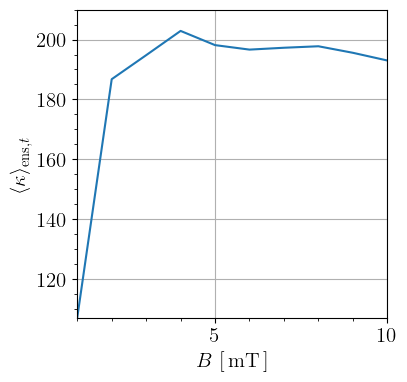

In [7]:
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(fields,op)

ax.set_xlim(1,10)
ax.set_ylim(min(op),210)
ax.set_xlabel("$B$ [\\,mT\\,]", fontsize=15)
ax.set_ylabel(r"$\langle \kappa \rangle_{\mathrm{ens},t}$",fontsize=15)

ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.xaxis.set_minor_locator(plt.NullLocator())
ax.xaxis.set_minor_formatter(plt.NullFormatter())


ax.yaxis.set_major_locator(plt.MultipleLocator(20))
ax.yaxis.set_minor_locator(plt.NullLocator())
ax.yaxis.set_minor_formatter(plt.NullFormatter())

ax.tick_params(axis='both', which='major', labelsize=15)
ax.minorticks_on()

ax.grid()

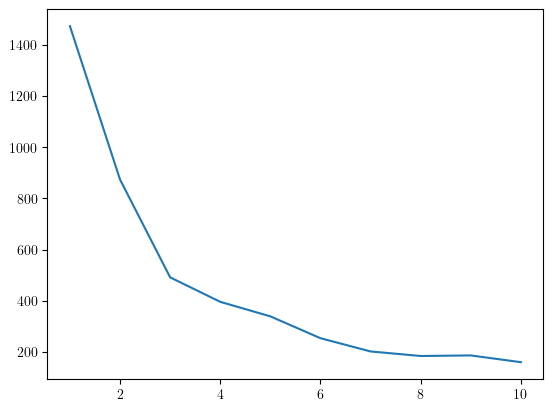

In [8]:
plt.plot(fields,op_var)

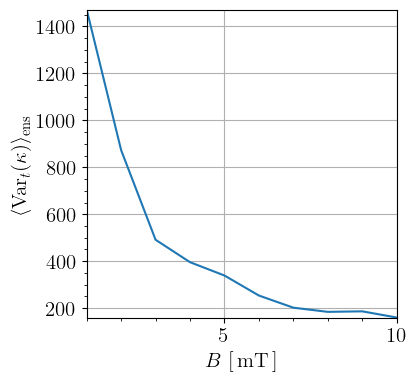

In [10]:
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(fields,op_var)

ax.set_xlim(1,10)
ax.set_ylim(min(op_var),max(op_var))
ax.set_xlabel("$B$ [\\,mT\\,]", fontsize=15)
# ax.set_ylabel(r"$\mathrm{Var}_t( \langle \kappa \rangle_\mathrm{ens} )$",fontsize=15)
ax.set_ylabel(r"$\langle \mathrm{Var}_t( \kappa ) \rangle_\mathrm{ens}$",fontsize=15)

ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.xaxis.set_minor_locator(plt.NullLocator())
ax.xaxis.set_minor_formatter(plt.NullFormatter())


# ax.yaxis.set_major_locator(plt.MultipleLocator(20))
# ax.yaxis.set_minor_locator(plt.NullLocator())
# ax.yaxis.set_minor_formatter(plt.NullFormatter())

ax.tick_params(axis='both', which='major', labelsize=15)
ax.minorticks_on()

ax.grid()